In [1]:
!pip install praat-parselmouth

In [2]:
#imports
import glob
import numpy as np
import pandas as pd
import parselmouth
import os
import sys

from parselmouth.praat import call
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
path1 = 'C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology'
path2 = 'C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonControl'
path3 = 'C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/SPAControl'
paths = [path1, path2,path3]

In [3]:
'Creating a sample sound for doctest'

for wave_file in glob.glob(os.path.join(path1, '*.wav')):
    sound1 = parselmouth.Sound(wave_file)
    break
sound1

In [4]:

def extract_features(voiceID, f0min, f0max, unit):
    """
    This is the function to load each sound file and extract features.
    >>> extract_features(sound1, 75, 500, "Hertz")
    (202.31336427770978, 52.451310541535975, 14.066366067251316, 0.007036694401224912, 3.4642489470585426e-05, 0.004100624363329477, 0.0038012775559884394, 0.012301873089988431, 0.07683386215406253, 0.7077260601654799, 0.04158615579919419, 0.042283775441164656, 0.05708996145918256, 0.12475846739758256)
    >>> extract_features(sound1, 1,2,'Hertz')
    (nan, nan, 14.066366067251316, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)
    """
    #sound = parselmouth.Sound(voiceID)
  
    sound = parselmouth.Sound(voiceID) # read the sound  
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
    ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
    ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
    localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq3Shimmer = call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    aqpq5Shimmer = call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq11Shimmer =  call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    ddaShimmer = call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    

    return meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer


if __name__ == "__main__":
    import doctest
    doctest.testmod()

In [5]:
# create lists to put the results
file_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []
localJitter_list = []
localabsoluteJitter_list = []
rapJitter_list = []
ppq5Jitter_list = []
ddpJitter_list = []
localShimmer_list = []
localdbShimmer_list = []
apq3Shimmer_list = []
aqpq5Shimmer_list = []
apq11Shimmer_list = []
ddaShimmer_list = []


In [6]:
def get_wav_files():
    sounds = []
    labels = []
    for pathq in paths:
        for wave_file in glob.glob(os.path.join(pathq, '*.wav')):
            print(wave_file)
            sounds.append(parselmouth.Sound(wave_file))
            if('FD' in wave_file or 'MD' in wave_file):
                labels.append(1)
            elif('FC' in wave_file or 'MC' in wave_file):
                labels.append(0)
            else:
                if("SPA" not in wave_file):
                    raise Exception
                labels.append(0)
    return sounds,labels
    

sounds,labels = get_wav_files()
print(type(sounds))

C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD010_T1_a_84.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD010_T4_a_84.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD013_T1_a_NA.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD013_T4_a_NA.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD015_T1_a_139.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD016_T1_a_NA.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD016_T4_a_NA.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD017_T1_a_NA.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD01_T1_a_NA.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD01_T4_a_NA.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD020_T1_a_NA.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/UncommonPathology\FD021_T1_a_NA.wav
C:/Users/kashy/Desktop/NeuroAcoustic - Ab

In [7]:
#sounds = get_wav_files()
for sound2 in sounds:
    (meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer) = extract_features(sound2, 75, 500, "Hertz")
    file_list.append(wave_file) # make an ID list
    mean_F0_list.append(meanF0) # make a mean F0 list
    sd_F0_list.append(stdevF0) # make a sd F0 list
    hnr_list.append(hnr)
    localJitter_list.append(localJitter)
    localabsoluteJitter_list.append(localabsoluteJitter)
    rapJitter_list.append(rapJitter)
    ppq5Jitter_list.append(ppq5Jitter)
    ddpJitter_list.append(ddpJitter)
    localShimmer_list.append(localShimmer)
    localdbShimmer_list.append(localdbShimmer)
    apq3Shimmer_list.append(apq3Shimmer)
    aqpq5Shimmer_list.append(aqpq5Shimmer)
    apq11Shimmer_list.append(apq11Shimmer)
    ddaShimmer_list.append(ddaShimmer)
df = pd.DataFrame(np.column_stack([file_list, mean_F0_list, sd_F0_list, hnr_list, localJitter_list, localabsoluteJitter_list, rapJitter_list, ppq5Jitter_list, ddpJitter_list, localShimmer_list, localdbShimmer_list, apq3Shimmer_list, aqpq5Shimmer_list, apq11Shimmer_list, ddaShimmer_list]),
                               columns=['voiceID', 'meanF0Hz', 'stdevF0Hz', 'HNR', 'localJitter', 'localabsoluteJitter', 'rapJitter', 
                                        'ppq5Jitter', 'ddpJitter', 'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'apq5Shimmer', 
                                        'apq11Shimmer', 'ddaShimmer'])  #add these lists to pandas in the right order
labelcolumn = pd.DataFrame(labels,columns=['Label'])
df.tail()


,voiceID,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer
113,C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/Un...,254.07172877089664,2.4222316423469286,24.004893556210593,0.009496129058818338,3.737485977254889e-05,0.006033607707245646,0.005034827697860465,0.018100823121736935,0.04398019381105404,0.3902654762941022,0.026278284941824628,0.023965561039326073,0.029003353809562815,0.07883485482547388
114,C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/Un...,161.18015641909028,5.626718505232185,24.970201508197867,0.0044051363847610586,2.733214007324522e-05,0.00263404752326997,0.002564980181510921,0.00790214256980991,0.034233185774777346,0.30819346954197735,0.019828073234567124,0.02018780862752903,0.02351584315785854,0.05948421970370137
115,C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/Un...,276.16422345461,2.9068291130326473,29.992337692250228,0.0013435809777272109,4.86514615515147e-06,0.0007201998296855888,0.0007928920770315556,0.0021605994890567665,0.010728406498344029,0.0938457124840421,0.005127373580999144,0.006365452577624472,0.009699891020888307,0.015382120742997432
116,C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/Un...,113.99321032645743,1.4859631621821263,17.62407148249402,0.005213004891556962,4.5731666340991526e-05,0.0028457731823814648,0.0031460793195942902,0.008537319547144394,0.06905532087022011,0.6020928605206403,0.04069279960551465,0.04174684736107436,0.04725463597164112,0.12207839881654395
117,C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/Un...,210.0778646241518,1.3627731177320674,27.116190457122592,0.003781285200125983,1.7999624323761273e-05,0.0023994001503394157,0.001844069834224505,0.007198200451018247,0.029805033030237765,0.25838703493229953,0.018022532270150795,0.015731153514364604,0.018968875916209032,0.05406759681045238


In [8]:
mean_F0_list

[202.31336427770978,
 207.90108479635367,
 195.53565101517236,
 149.277050125038,
 303.71627771098673,
 279.97778158608406,
 327.1838980283247,
 152.26423364636534,
 149.53197645024682,
 148.86358060746915,
 128.5149381795609,
 220.83348780732456,
 180.36726650934838,
 187.66952044304662,
 174.93115888620375,
 175.68382306098556,
 214.15195932695644,
 191.1245514474567,
 235.62852749741668,
 214.60947730089367,
 191.36213380882248,
 257.2883426414023,
 114.92053492061288,
 151.71136849895805,
 208.97658181351625,
 262.03541703093686,
 198.95580296117208,
 194.5773172709956,
 167.60096344075893,
 153.07574999335213,
 246.2499898709096,
 228.80840781614813,
 184.9841558220503,
 250.66884486710492,
 272.5969307329853,
 132.46479716969873,
 143.27834017989804,
 280.1487841327653,
 135.96544754770088,
 119.2583203989611,
 153.4604637147282,
 171.00175101980645,
 240.60962777722222,
 221.04596923653375,
 167.1828165021685,
 190.29694120514156,
 162.59906747670607,
 147.86089805269754,
 159.2

In [9]:
def runPCA(df):
    '''
    >>> sample = runPCA(df)
    >>> sample.iloc[0]
    JitterPCA    -0.118735
    ShimmerPCA   -0.862570
    Name: 0, dtype: float64
    
    '''
    #Z-score the Jitter and Shimmer measurements
    features = ['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
                'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer']
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    #y = df.loc[:,['target']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    #PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['JitterPCA', 'ShimmerPCA'])
    principalDf
    return principalDf
if __name__ == "__main__":
    import doctest
    doctest.testmod()

In [10]:
pcaData = runPCA(df)
df1 = pd.concat([df, pcaData ,labelcolumn], axis=1)
# Write out the updated dataframe
df1.to_csv("processed_results.csv", index=False)

In [11]:
dataset = pd.read_csv('processed_results.csv')
dataset.head()

,voiceID,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,JitterPCA,ShimmerPCA,Label
0,C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/Un...,202.313364,52.451311,14.066366,0.007037,0.000035,0.004101,0.003801,0.012302,0.076834,0.707726,0.041586,0.042284,0.057090,0.124758,-0.118735,-0.862570,1
1,C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/Un...,207.901085,44.684740,17.173289,0.006620,0.000032,0.003457,0.003712,0.010372,0.051322,0.536046,0.026023,0.032360,0.041922,0.078068,-1.209159,-0.084357,1
2,C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/Un...,195.535651,98.238245,5.777353,0.030141,0.000157,0.015543,0.016714,0.046628,0.169011,1.550624,0.087928,0.120576,0.143564,0.263784,6.925330,-1.429250,1
3,C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/Un...,149.277050,25.308604,11.219313,0.011197,0.000075,0.004770,0.005721,0.014310,0.125776,1.057003,0.055973,0.078761,0.120379,0.167919,2.270515,-2.112091,1
4,C:/Users/kashy/Desktop/NeuroAcoustic - Abhi/Un...,303.716278,77.954255,5.740027,0.037437,0.000127,0.019611,0.023408,0.058834,0.164430,1.414724,0.079621,0.099380,0.129718,0.238863,6.918932,0.065115,1


Text(0, 0.5, 'Harmonic to noise ratio')

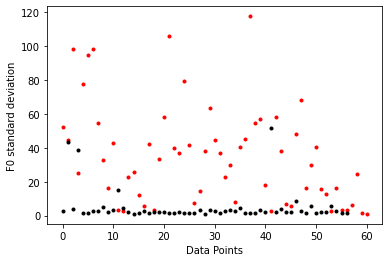

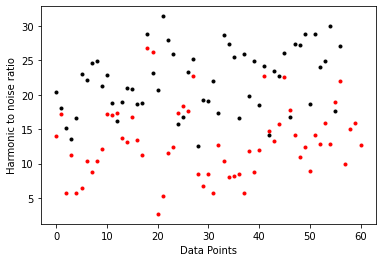

In [12]:
rows = len(dataset)
columns = len(dataset.columns)
col = 2
sick =[]
healthy =[]
label = []
for i in range(rows):
        if(dataset.iloc[i,-1]==1):
            sick.append(dataset.iloc[i,col])
            label.append
        else:
            healthy.append(dataset.iloc[i,col])
            
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(sick,'.',color='red')
plt.plot(healthy,'.',color='black')
plt.xlabel("Data Points")
plt.ylabel("F0 standard deviation")
plt.figure(2)
col = 3
sick =[]
healthy =[]
label = []
for i in range(rows):
        if(dataset.iloc[i,-1]==1):
            sick.append(dataset.iloc[i,col])
            label.append
        else:
            healthy.append(dataset.iloc[i,col])
plt.plot(sick,'.',color='red')
plt.plot(healthy,'.',color='black')
plt.xlabel("Data Points")
plt.ylabel("Harmonic to noise ratio")

In [13]:
features = dataset[['meanF0Hz','stdevF0Hz','HNR','JitterPCA','ShimmerPCA']]
#X = dataset.iloc[:, :-1].values
print(features.columns)
X = features.values
X


Index(['meanF0Hz', 'stdevF0Hz', 'HNR', 'JitterPCA', 'ShimmerPCA'], dtype='object')


array([[ 2.02313364e+02,  5.24513105e+01,  1.40663661e+01,
        -1.18734594e-01, -8.62569626e-01],
       [ 2.07901085e+02,  4.46847396e+01,  1.71732892e+01,
        -1.20915928e+00, -8.43565404e-02],
       [ 1.95535651e+02,  9.82382455e+01,  5.77735295e+00,
         6.92533048e+00, -1.42925016e+00],
       [ 1.49277050e+02,  2.53086045e+01,  1.12193127e+01,
         2.27051460e+00, -2.11209071e+00],
       [ 3.03716278e+02,  7.79542553e+01,  5.74002667e+00,
         6.91893238e+00,  6.51150252e-02],
       [ 2.79977782e+02,  9.50749374e+01,  6.41055897e+00,
         1.17931824e+01,  4.19410635e+00],
       [ 3.27183898e+02,  9.83322552e+01,  1.03229524e+01,
         1.26583470e+01,  3.85739247e+00],
       [ 1.52264234e+02,  5.46406690e+01,  8.76819856e+00,
         5.11443794e+00, -1.34676328e+00],
       [ 1.49531976e+02,  3.26531806e+01,  1.04169565e+01,
         3.90915012e+00,  1.04613516e+00],
       [ 1.48863581e+02,  1.64052110e+01,  1.21234744e+01,
         1.56821120e+00

In [14]:
#Check the data for abnormalities
means = X[:,0]
print(max(means)- min(means) >0)
print(type(means[0]) ==np.float64)
for xx in X[:,1]:
    if(xx < 0):
        print(False)

True
True


In [15]:
y = dataset.iloc[:, -1].values
Y = dataset.iloc[:, -1]
#labels
#output labels are 1 or 0. 1 means the person is sick and other means they are healthy.
print(y.T)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
for x in range(len(y_pred)):
    if(y_pred[x]>0.5):
        y_pred[x] = 1
    else:
        y_pred[x]=0

In [17]:
from sklearn.metrics import r2_score, confusion_matrix
r2_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
cm

array([[13,  5],
       [ 1, 17]], dtype=int64)

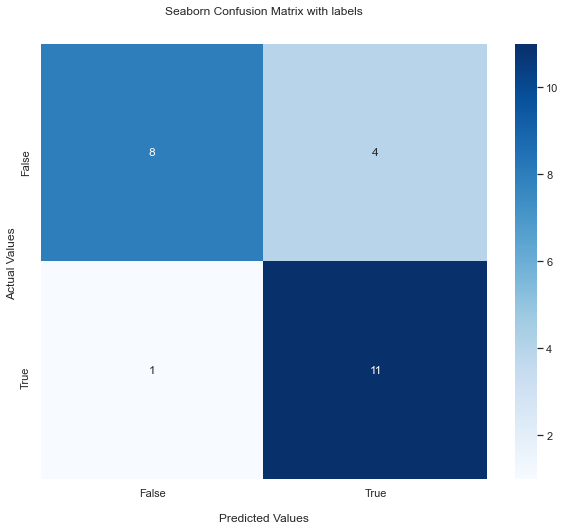

In [23]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')
sns.set(rc = {'figure.figsize':(15,8)})
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

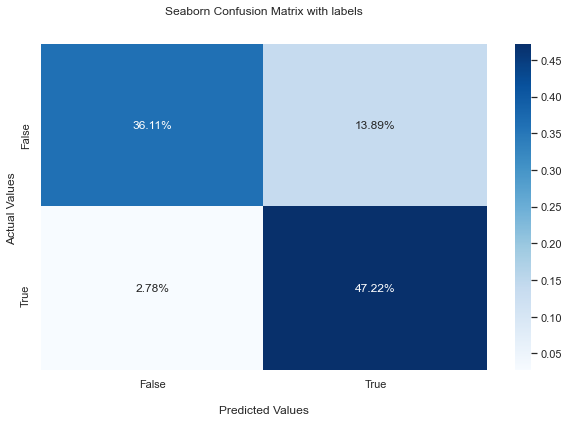

In [19]:
import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
sns.set(rc = {'figure.figsize':(8,8)})
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

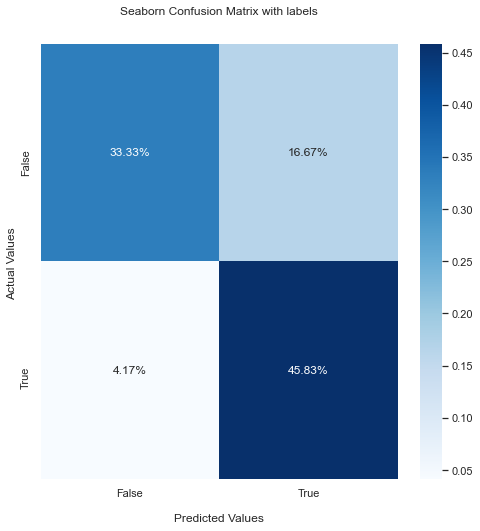

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
for x in range(len(y_pred)):
    if(y_pred[x]>0.5):
        y_pred[x] = 1
    else:
        y_pred[x]=0
        
from sklearn.metrics import r2_score, confusion_matrix
r2_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
sns.set(rc = {'figure.figsize':(8,8)})
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [21]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f with standard deviation %.3f' % (mean(scores), std(scores)))

Accuracy: 0.856 with standard deviation 0.053
